## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## 데이터 생성

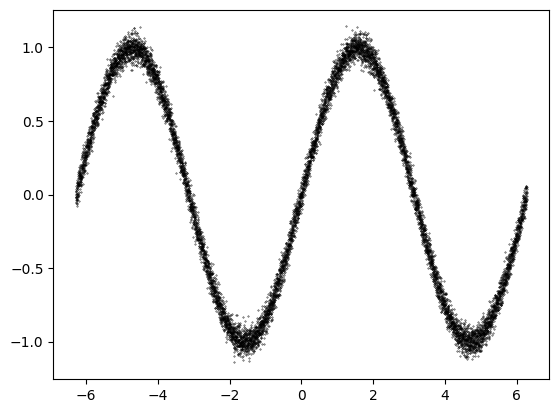

In [2]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [3]:
print(inputs.shape, outputs.shape)

(10000, 1) (10000, 1)


## 모델 정의

In [4]:
model = Sequential([
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1)
])

## 모델 훈련

In [5]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, batch_size=32, epochs=20)

Epoch 1/20
313/313 [==============================] - 4s 3ms/step - loss: 0.3957 - mae: 0.3957
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1511 - mae: 0.1511
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1202 - mae: 0.1202
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1021 - mae: 0.1021
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0900 - mae: 0.0900
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0793 - mae: 0.0793
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0692 - mae: 0.0692
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0636 - mae: 0.0636
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0577 - mae: 0.0577
Epoch 10/20
313/313 [==============================] - 2s 5ms/step - loss: 0.0537 - mae: 0.0537
Epoch 11/20
313/313 [============================

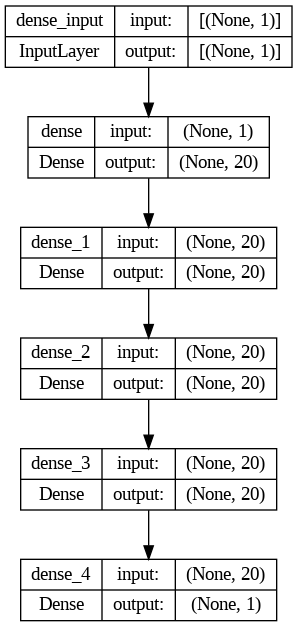

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs, outputs, verbose=0)
print('Test MAE:', test_mae)

Test MAE: 0.05544218793511391


## 테스트

313/313 [==============================] - 1s 3ms/step


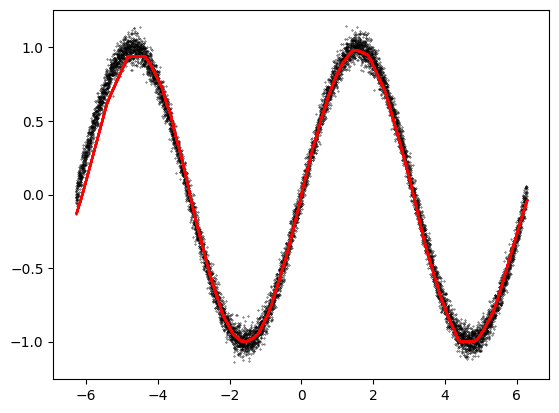

In [8]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)